In [21]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt

In [24]:
data = pd.read_csv("C:\\Users\\varun\\Dropbox\\My PC (DESKTOP-MBMVSID)\\Downloads\\data_28-10.csv")
len(data)
data

,Sensor 1 Temp,Sensor 2 Temp,Timestep,X,Y,Z,Temp
0,308.003540,308.003479,1,-0.620,-1.32,1.48,308.009094
1,308.003540,308.003479,1,-0.930,-0.92,1.48,308.009094
2,308.003540,308.003479,1,-0.300,-1.55,1.72,308.009094
3,308.003540,308.003479,1,-0.001,-0.70,1.39,308.008850
4,308.003540,308.003479,1,-0.720,-0.76,1.25,308.009064
...,...,...,...,...,...,...,...
189373,285.617218,289.185272,6720,-0.730,-3.35,1.31,285.797241
189374,285.617218,289.185272,6720,-0.620,-4.23,1.87,290.172668
189375,285.617218,289.185272,6720,-1.100,-4.17,1.79,289.185272
189376,285.617218,289.185272,6720,-1.300,-3.80,1.58,289.218384


In [32]:
df = data.iloc[:,0:]
df.head()

,Sensor 1 Temp,Sensor 2 Temp,Timestep,X,Y,Z,Temp
0,308.00354,308.003479,1,-0.620,-1.32,1.48,308.009094
1,308.00354,308.003479,1,-0.930,-0.92,1.48,308.009094
2,308.00354,308.003479,1,-0.300,-1.55,1.72,308.009094
3,308.00354,308.003479,1,-0.001,-0.70,1.39,308.008850
4,308.00354,308.003479,1,-0.720,-0.76,1.25,308.009064


In [33]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X.head()

,Sensor 1 Temp,Sensor 2 Temp,Timestep,X,Y,Z
0,308.00354,308.003479,1,-0.620,-1.32,1.48
1,308.00354,308.003479,1,-0.930,-0.92,1.48
2,308.00354,308.003479,1,-0.300,-1.55,1.72
3,308.00354,308.003479,1,-0.001,-0.70,1.39
4,308.00354,308.003479,1,-0.720,-0.76,1.25


In [34]:
X_train_in, X_test_in, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_in.shape

(151502, 6)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train_in)

X_train = scaler.transform(X_train_in)
X_test = scaler.transform(X_test_in)

In [36]:
import pickle
scalerfile = 'scaler.sav'                            
pickle.dump(scaler, open(scalerfile, 'wb'))

In [37]:
model = Sequential()
model.add(Dense(128, input_dim=6, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(16, activation= "relu"))
model.add(Dense(8, activation= "relu"))

#Output layer
model.add(Dense(1))

opt = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='mean_absolute_error', optimizer=opt,metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               896       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                

In [38]:
history = model.fit(X_train, Y_train, epochs=1500,validation_data=(X_test, Y_test),batch_size=256)

Epoch 1/1500
592/592 [==============================] - 4s 5ms/step - loss: 53.3310 - mae: 53.3310 - val_loss: 5.6180 - val_mae: 5.6180
Epoch 2/1500
592/592 [==============================] - 3s 4ms/step - loss: 3.9446 - mae: 3.9446 - val_loss: 3.3393 - val_mae: 3.3393
Epoch 3/1500
592/592 [==============================] - 3s 4ms/step - loss: 3.3155 - mae: 3.3155 - val_loss: 3.0822 - val_mae: 3.0822
Epoch 4/1500
592/592 [==============================] - 3s 4ms/step - loss: 3.1527 - mae: 3.1527 - val_loss: 3.1693 - val_mae: 3.1693
Epoch 5/1500
592/592 [==============================] - 3s 4ms/step - loss: 2.9941 - mae: 2.9941 - val_loss: 2.8860 - val_mae: 2.8860
Epoch 6/1500
592/592 [==============================] - 3s 5ms/step - loss: 2.8727 - mae: 2.8727 - val_loss: 2.8188 - val_mae: 2.8188
Epoch 7/1500
592/592 [==============================] - 3s 4ms/step - loss: 2.6720 - mae: 2.6720 - val_loss: 2.5968 - val_mae: 2.5968
Epoch 8/1500
592/592 [==============================] - 2s 4

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(model.predict(X_test), Y_test)

1184/1184 [==============================] - 4s 2ms/step


0.23960150813403677

In [40]:
model.predict(scaler.transform(np.array([[285.695,306.202,1338,-0.62,-1.32,1.48]])))

1/1 [==============================] - 0s 15ms/step


C:\Users\varun\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[285.56335]], dtype=float32)

In [41]:
import numpy as np

x_y_z = np.zeros((8, 20, 8))

x = np.array([-1.8775,
 -1.5925,
 -1.3075,
 -1.0225,
 -0.7375,
 -0.4525,
 -0.16758,
 0.1175])

y = np.array([-4.54375,
 -4.27125,
 -3.99875,
 -3.72625,
 -3.45375,
 -3.18125,
 -2.90875,
 -2.63625,
 -2.36375,
 -2.09125,
 -1.81875,
 -1.54625,
 -1.27375,
 -1.00125,
 -0.72875,
 -0.45625,
 -0.18375,
 0.08875,
 0.36125,
 0.63375])


z = np.array([-0.057875,
 0.226375,
 0.510625,
 0.794875,
 1.079125,
 1.363375,
 1.647625,
 1.931875])

def get_boxes(x, y, z, t1, t2, ts, y_val):
  boxes = []
  differences = abs(y - y_val)
  midpoint_index = np.argmin(differences)
  if y_val >= np.min(y) and y_val <= np.max(y):
    for i in range(len(x)):
      for k in range(len(z)):
        boxes.append([t1, t2, ts, x[i], y[midpoint_index], z[k]])
  return boxes

all_boxes = get_boxes(x, y, z, 285.695, 306.202, 3000, -3.16)

In [67]:
all_boxes

array([[ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00, -5.787500e-02],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00,  2.263750e-01],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00,  5.106250e-01],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00,  7.948750e-01],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00,  1.079125e+00],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00,  1.363375e+00],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00,  1.647625e+00],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.877500e+00,
        -3.181250e+00,  1.931875e+00],
       [ 2.856950e+02,  3.062020e+02,  3.000000e+03, -1.592500e+00,
        -3.181250e+00, -5.787500e-02],
       [ 2.856950e+02,  3.062020e+02,

In [43]:
all_boxes = np.array(all_boxes)
all_boxes
temps = model.predict(scaler.transform(all_boxes))

2/2 [==============================] - 0s 0s/step


C:\Users\varun\anaconda3\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [54]:
def quality(t, temp, a0 = 100):
  q = a0 * (1 - 0.041 * t * np.exp(-42.35/temp))
  return q

quality = quality(2, temps)
print(quality)

[[92.860016]
 [92.85439 ]
 [92.84517 ]
 [92.84992 ]
 [92.86351 ]
 [92.8766  ]
 [92.89335 ]
 [92.91392 ]
 [92.88779 ]
 [92.85675 ]
 [92.85103 ]
 [92.85716 ]
 [92.87163 ]
 [92.884186]
 [92.91481 ]
 [92.92722 ]
 [92.908966]
 [92.87243 ]
 [92.8552  ]
 [92.86091 ]
 [92.87186 ]
 [92.88968 ]
 [92.917175]
 [92.9361  ]
 [92.93341 ]
 [92.89351 ]
 [92.850716]
 [92.84984 ]
 [92.86623 ]
 [92.88165 ]
 [92.90445 ]
 [92.9252  ]
 [92.915535]
 [92.89297 ]
 [92.85361 ]
 [92.86089 ]
 [92.871635]
 [92.88574 ]
 [92.90425 ]
 [92.91252 ]
 [92.9155  ]
 [92.892334]
 [92.86986 ]
 [92.88089 ]
 [92.88688 ]
 [92.90519 ]
 [92.91143 ]
 [92.91504 ]
 [92.91655 ]
 [92.900314]
 [92.894684]
 [92.89948 ]
 [92.91683 ]
 [92.92866 ]
 [92.93037 ]
 [92.92695 ]
 [92.918724]
 [92.905334]
 [92.911514]
 [92.91372 ]
 [92.93232 ]
 [92.94151 ]
 [92.939705]
 [92.934105]]


In [55]:
quality = quality.reshape((8, 8))

In [14]:
model.save('Model')

INFO:tensorflow:Assets written to: Model\assets


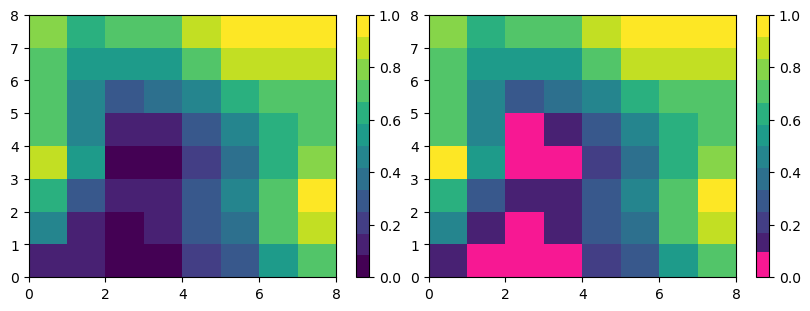

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

q1 = (quality - np.min(quality))/(np.max(quality) - np.min(quality))

def plot_examples(cms, data):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = data

    fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=1)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp], q1)

In [15]:
from tensorflow import keras
rel_model = keras.models.load_model('Model')

In [16]:
rel_model.predict(scaler.transform(np.array([[285.695,306.202,1,-0.62,-1.32,1.48]])))

D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 161ms/step


array([[459.66608]], dtype=float32)

In [17]:
ar=[]
graph=[]
for i in range(101):
    ar.append(i*100)
for j in ar:
    brr=scaler.transform(np.array([[285.695,306.202,j,-0.62,-1.32,1.48]]))
    graph.append(round(float(rel_model.predict(brr)),5))
graph

1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


D:\coding\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[459.64832,
 461.45731,
 463.62653,
 466.04755,
 468.97449,
 472.07697,
 475.33478,
 478.60278,
 482.01663,
 485.47845,
 489.09485,
 492.85016,
 496.76401,
 501.07883,
 505.42914,
 510.53412,
 515.75079,
 521.03937,
 526.43597,
 532.1759,
 537.9137,
 543.48853,
 549.35358,
 555.22644,
 561.13867,
 567.0509,
 572.96332,
 578.87567,
 585.12616,
 591.58051,
 598.29767,
 605.05927,
 611.8703,
 619.08405,
 626.34161,
 633.60303,
 640.86993,
 648.13495,
 655.45898,
 662.9942,
 670.5296,
 678.06476,
 685.64264,
 693.29938,
 700.9566,
 708.64105,
 716.36041,
 724.10919,
 731.86334,
 739.63104,
 747.39862,
 755.1662,
 763.13263,
 771.09351,
 779.05756,
 787.05273,
 795.04602,
 803.03918,
 811.08569,
 819.1579,
 827.22992,
 835.30206,
 843.37415,
 851.44623,
 859.51837,
 867.59558,
 875.68433,
 883.80524,
 891.92609,
 900.0722,
 908.24231,
 916.41199,
 924.58197,
 932.75189,
 940.92175,
 949.09485,
 957.37775,
 965.73151,
 974.0849,
 982.43866,
 990.79218,
 999.14575,
 1007.49939,
 1015.85291,
 